### Pneumonia Detection on Chest X-Rays using Transfer Learning
##### William G Morgan
####  3/18/2019


In [1]:
# Import all libraries at top of notebook
#matplotlib figures appear inline in the notebook rather than in a new window.
%matplotlib inline  

import time
import json
import os
import numpy as np
import re
import cv2
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from matplotlib.pyplot import figure

import torch
import torchvision
import torch.nn.functional as F

from torch import nn
from torch import optim
from torch.autograd import Variable
from torchvision import datasets, transforms, models
from PIL import Image

from includes.training import train_model, load_model
from includes.util_func import *

## Load Data into data loaders for training, testing and validation datasets. Use random rotation, horizontal flip to help model generalize better.

In [3]:
# Location of data to be imported.
data_dir = 'data'


# Defining transforms for training, testing, and validation datasets.
data_transforms = {
    'train': transforms.Compose([
        transforms.RandomRotation(45),
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
     ]),
    'valid': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
     ]),
    'test': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
     ])
}
    
# Using ImageFolder, load the image datasets.
image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x), transform=data_transforms[x]) for x in list(data_transforms.keys())}

In [4]:
dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=4, shuffle=True, num_workers=2) for x in list(image_datasets.keys())}

## Check to ensure dataloaders[training data] is loading properly.

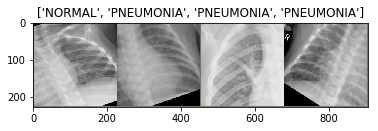

In [5]:
# Source: http://pytorch.org/tutorials/beginner/transfer_learning_tutorial.html
def imshow(inp, title=None):
    """imshow for tensor"""
    inp = inp.numpy().transpose((1,2,0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0,1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001) # pause a bit so that plots are updated

    
# get a batch of training data
images, labels = next(iter(dataloaders['train']))

# get the class names
class_names = image_datasets['train'].classes

#make a grid from batch
inputs = torchvision.utils.make_grid(images, nrow=4)
imshow(inputs, title=[class_names[x] for x in labels])

In [6]:
len(image_datasets['train']), len(image_datasets['valid']), len(image_datasets['test'])

(5216, 320, 320)

In [7]:
print(class_names)

['NORMAL', 'PNEUMONIA']


In [8]:
training_dir = data_dir + "/train"
validation_dir = data_dir + "/valid"
testing_dir = data_dir + "/test"

## Visualize Training, Validation & Testing datasets.

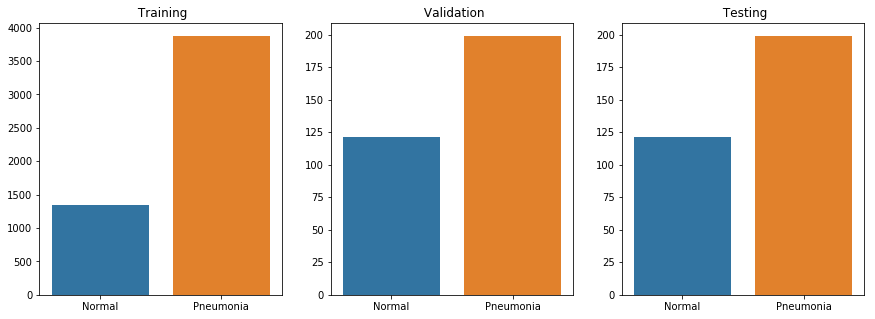

In [10]:
plot_params = get_plot_params()

plot_params['figsize'] = (20,5)
plot_params['title_fontsize'] = 12
plot_params['label_fontsize'] = 18
plot_params['subplot'] = 141

barchart_TVT(training_dir, validation_dir, testing_dir, plot_params)

## Use pre-trained model [VGG13] and take advantage of Transfer Learning

In [11]:
# Build and train network using VGG13 architecture.
# Source: https://pytorch.org/docs/master/torchvision/models.html
model = train_model(image_datasets, arch='vgg13', hidden_units=2048, checkpoint='./models/model_vgg13_xrays.pth', epochs=30, learning_rate=0.001, gpu=True)

vgg13 30 0.001 True
pre-trained network [arch]: vgg13
hidden units: 2048
Learning rate: 0.001
epochs: 30
Model loaded :  vgg13
Using GPU for training
Epoch 1/30
----------
train Loss: 0.4650 Acc: 0.7964
valid Loss: 0.4751 Acc: 0.7625

Epoch 2/30
----------
train Loss: 0.3977 Acc: 0.8244
valid Loss: 0.4017 Acc: 0.7969

Epoch 3/30
----------
train Loss: 0.3849 Acc: 0.8332
valid Loss: 0.4225 Acc: 0.8031

Epoch 4/30
----------
train Loss: 0.3816 Acc: 0.8322
valid Loss: 0.4441 Acc: 0.8313

Epoch 5/30
----------
train Loss: 0.3803 Acc: 0.8390
valid Loss: 0.3990 Acc: 0.8219

Epoch 6/30
----------
train Loss: 0.3794 Acc: 0.8414
valid Loss: 0.4170 Acc: 0.8281

Epoch 7/30
----------
train Loss: 0.3652 Acc: 0.8428
valid Loss: 0.4090 Acc: 0.8188

Epoch 8/30
----------
train Loss: 0.3646 Acc: 0.8441
valid Loss: 0.4097 Acc: 0.8188

Epoch 9/30
----------
train Loss: 0.3523 Acc: 0.8518
valid Loss: 0.4069 Acc: 0.8125

Epoch 10/30
----------
train Loss: 0.3572 Acc: 0.8476
valid Loss: 0.4087 Acc: 0.8250


## Use pre-trained model [Alexnet] and take advantage of Transfer Learning

In [12]:
# Build and train network using Alexnet architecture.
# Source: https://pytorch.org/docs/master/torchvision/models.html
model = train_model(image_datasets, arch='alexnet', hidden_units=2048, checkpoint='./models/model_alexnet_xrays.pth', epochs=30, learning_rate=0.001, gpu=True)

alexnet 30 0.001 True
pre-trained network [arch]: alexnet
hidden units: 2048
Learning rate: 0.001
epochs: 30
Model loaded :  alexnet
Using GPU for training
Epoch 1/30
----------
train Loss: 0.4280 Acc: 0.8108
valid Loss: 0.4066 Acc: 0.8250

Epoch 2/30
----------
train Loss: 0.3695 Acc: 0.8349
valid Loss: 0.4357 Acc: 0.8438

Epoch 3/30
----------
train Loss: 0.3399 Acc: 0.8445
valid Loss: 0.3500 Acc: 0.8344

Epoch 4/30
----------
train Loss: 0.3336 Acc: 0.8507
valid Loss: 0.3688 Acc: 0.8469

Epoch 5/30
----------
train Loss: 0.3313 Acc: 0.8528
valid Loss: 0.3560 Acc: 0.8594

Epoch 6/30
----------
train Loss: 0.3392 Acc: 0.8491
valid Loss: 0.4106 Acc: 0.8469

Epoch 7/30
----------
train Loss: 0.3358 Acc: 0.8503
valid Loss: 0.3636 Acc: 0.8406

Epoch 8/30
----------
train Loss: 0.3210 Acc: 0.8625
valid Loss: 0.3802 Acc: 0.8656

Epoch 9/30
----------
train Loss: 0.3103 Acc: 0.8692
valid Loss: 0.3635 Acc: 0.8563

Epoch 10/30
----------
train Loss: 0.3066 Acc: 0.8689
valid Loss: 0.3744 Acc: 0

In [13]:
print(model)

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Dropout(p=0.5)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
    (2): ReLU(inplace)
    (3): Dropout(p=0.5)
    (4): Linear(in_features=4096, out_feature

In [14]:
print(model.features)
print(model.state_dict())

Sequential(
  (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
  (1): ReLU(inplace)
  (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (4): ReLU(inplace)
  (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (7): ReLU(inplace)
  (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (9): ReLU(inplace)
  (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (11): ReLU(inplace)
  (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
)
OrderedDict([('features.0.weight', tensor([[[[ 0.1186,  0.0941,  0.0954,  ...,  0.0558,  0.0216,  0.0500],
          [ 0.0749,  0.0389,  0.0530,  ...,  0.0257, -0.0113,  0.0042],
          [ 0.0754,  0.0388,  0.0549,  ...,  0.0436,  0.0102,  0.0133],
        

## Manually save our Trained model if not saved during training session.

In [12]:
# Save the checkpoint 
model.class_to_idx = image_datasets['train'].class_to_idx

checkpoint = {
    'arch': 'alexnet',
    'class_to_idx': model.class_to_idx, 
    'state_dict': model.state_dict(),
    'hidden_units': 2048
}

torch.save(checkpoint, './models/model_alexnet_xrays.pth')

print(model.state_dict().keys())

odict_keys(['features.0.weight', 'features.0.bias', 'features.3.weight', 'features.3.bias', 'features.6.weight', 'features.6.bias', 'features.8.weight', 'features.8.bias', 'features.10.weight', 'features.10.bias', 'classifier.1.weight', 'classifier.1.bias', 'classifier.4.weight', 'classifier.4.bias', 'classifier.7.weight', 'classifier.7.bias', 'classifier.10.weight', 'classifier.10.bias', 'classifier.12.weight', 'classifier.12.bias'])


In [15]:
def load_checkpoint(chkpt_path):
    
    checkpoint = torch.load(chkpt_path, map_location='cpu')
    arch = checkpoint['arch']
    num_labels = len(checkpoint['class_to_idx'])
    hidden_units = checkpoint['hidden_units']
    
    model = load_model(arch=arch, num_labels=num_labels, hidden_units=hidden_units)
    model.load_state_dict(checkpoint['state_dict'])
    model.class_to_idx = checkpoint['class_to_idx']
        
    return model

## Load Model so that we can vet its performance.

In [16]:
testmodelload = load_checkpoint('./models/model_alexnet_xrays.pth')
print(testmodelload)
print(testmodelload.state_dict().keys())

Model loaded :  alexnet
AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Dropout(p=0.5)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
    (2): ReLU(inplace)
    (3): Dropout(p=0.5)
    (4): Linear(in_fe

## Run a validation using Test data

In [17]:
mode = 'test'
start = time.time()
correct = 0
total = 0

TP = 0
FP = 0
TN = 0
FN = 0

with torch.no_grad():
    if torch.cuda.is_available():
        print("Using GPU")
        device = torch.device("cuda:0")        
    else:
        print("Using CPU")
        device = torch.device("cpu")
    

    for images, labels in dataloaders[mode]:
        images = images.to(device)
        labels = labels.to(device)        
        
        outputs = testmodelload(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        
        for i in range(len(predicted)):
            if labels[i]==predicted[i]==1:
                TP += 1                
            if predicted[i]==1 and labels[i]!=predicted[i]:
                FP += 1
            if labels[i]==predicted[i]==0:
                TN += 1
            if predicted[i]==0 and labels[i]!=predicted[i]:
                FN += 1
            
    run_time = time.time() - start
   # print('Accuracy of the network: ', "{:.2%}".format(correct / total))
    print('Total Runtime: ', run_time)    
    print("")
    print('True Positives: ', TP)
    print('False Positives: ', FP)
    print('True Negatives: ', TN)
    print('False Negatives: ', FN)

Using GPU
Total Runtime:  8.600346088409424

True Positives:  181
False Positives:  29
True Negatives:  92
False Negatives:  18


## Using our TP, FP, TN & FN values, lets determine our metrics for the model.

In [18]:
# Accuracy: (TP + TN)/(TP + FP + TN + FN)
Acc = (TP + TN)/(TP + FP + TN + FN)
print(Acc)

0.853125


In [19]:
# Precision: TP / (TP + FP)
Precision = TP / (TP + FP)
print(Precision)

0.861904761904762


In [20]:
# Recall: TP / (TP + FN)
Recall = TP / (TP + FN)
print(Recall)

0.9095477386934674


In [21]:
# Specificity: TN/(TN+FP)
Specificity = TN/(TN+FP)
print(Specificity)

0.7603305785123967


In [22]:
# F1 score: (2 * (Precision * Recall))/(Precision + Recall)
F1_score = (2 * (Precision * Recall))/(Precision + Recall)
print(F1_score)

0.8850855745721272


## Using our model, lets create a Confusion Matrix for visualization.

In [23]:
nb_classes = len(class_names)

device = torch.device("cpu")

confusion_matrix = torch.zeros(nb_classes, nb_classes)
with torch.no_grad():
    for i, (inputs, classes) in enumerate(dataloaders['test']):
        inputs = inputs.to(device)
        classes = classes.to(device)
        outputs = testmodelload(inputs)
        _, preds = torch.max(outputs, 1)
        for t, p in zip(classes.view(-1), preds.view(-1)):
                confusion_matrix[t.long(), p.long()] += 1

print(confusion_matrix)

tensor([[ 96.,  25.],
        [ 20., 179.]])


In [24]:
cm = torch.Tensor.numpy(confusion_matrix)  #Need to convert tensor to array

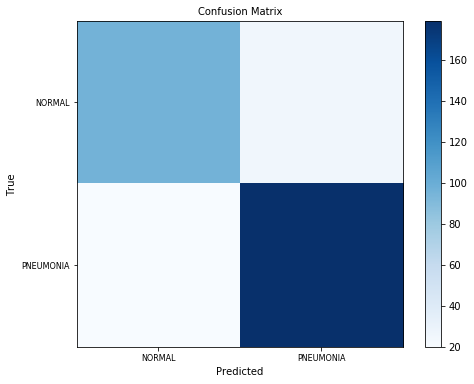

In [25]:
confusion_matrix_img = './images/confusion_matrix_img'

fig = plt.figure(figsize=(8,6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.colorbar()

plt.xticks(range(len(class_names)), class_names, fontsize=8)
plt.yticks(range(len(class_names)), class_names, fontsize=8)
plt.title("Confusion Matrix", fontsize=10)
fig.savefig(confusion_matrix_img, dpi=100)  #save image of CM
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [26]:
print(cm)

[[ 96.  25.]
 [ 20. 179.]]


## Let's visualize some predictions.

In [27]:
def predict(testmodelload, num_images=4):
    testmodelload.eval()
    images_cnt = 0
    fig = plt.figure()
    
    with torch.no_grad():
        if torch.cuda.is_available():
            #print("Using GPU")
            device = torch.device("cuda:0")
        else:
            #print("Using CPU")
            device = torch.device("cpu")
     
    
    for i, data in enumerate(dataloaders['test']):
        inputs, labels = data
        print('inputs.shape', inputs.shape)
        
        if device == "cuda:0":
            inputs, labels = Variable(inputs.cuda()), Variable(labels.cuda())
            print("Using GPU")
        else:
            inputs, labels = Variable(inputs), Variable(labels)
            print("Using CPU")
        
        outputs = testmodelload(inputs)
        _, preds = torch.max(outputs.data, 1)       
        probs = torch.nn.functional.softmax(outputs)
        probs = probs.data.numpy()         
                        
        for k in range(inputs.size()[0]):
            images_cnt += 1
            ax = plt.subplot(num_images//2, 2, images_cnt)            
            ax.axis('off')   
           # print(class_names[preds[k]])
           # print(labels[k])
            if labels[k]==1:
                #print('PNEUMONIA')
                label='PNEUMONIA'
            else:
                #print('NORMAL')
                label='NORMAL'
            if label==class_names[preds[k]]:
                #ax.set_title('Predicted: {} | Prob: {:.2%}'.format(class_names[preds[k]], probs[k][preds[k]]))
                ax.set_title("%s%s%s%s%s"%("True: ", label, "\n", "Pred: ", class_names[preds[k]]))
            else:
                #ax.set_title('Predicted: {} | Prob: {:.2%}'.format(class_names[preds[k]], probs[k][preds[k]]), color='red')
                ax.set_title("%s%s%s%s%s"%("True: ", label, "\n", "Pred: ", class_names[preds[k]]), color='red')
           
            imshow(inputs.cpu().data[k])
            if images_cnt == num_images:
                return

inputs.shape torch.Size([4, 3, 224, 224])
Using CPU


C:\Users\Bill\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


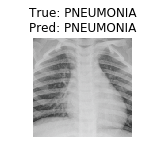

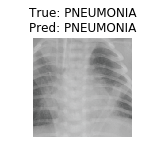

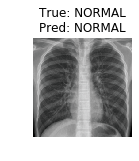

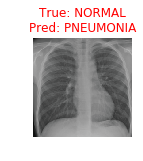

In [36]:
predict(testmodelload, num_images=4)

In [19]:
correct = 0
total = 0
with torch.no_grad():
    for data in dataloaders['test']:
        images, labels = data
        outputs = testmodelload(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on test images: 85 %


### That seems better than chance. Looks like the network learnt something!

### Now let's see how the individual classes performed.

In [21]:
class_correct = list(0. for i in range(2))
class_total = list(0. for i in range(2))
with torch.no_grad():
    for data in dataloaders['test']:
        images, labels = data
        outputs = testmodelload(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(2):
    print('Accuracy of %5s : %2d %%' % (
        class_names[i], 100 * class_correct[i] / class_total[i]))

Accuracy of NORMAL : 76 %
Accuracy of PNEUMONIA : 87 %
